### Exploratory Analysis ###

In [13]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("hot-100-current.csv")
data.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,50
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,2.0,2,44
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,4.0,3,41
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,5.0,4,25
4,2022-01-01,5,Easy On Me,Adele,3.0,1,11


# Cleaning and Organizing Data #

The data set was organized in such a way that made analysis difficult. Each week's Billboard Top 100 was placed consecutively, from 202X-1958. This meant that analyzing chart performance would require us to iterate through the list to find each instance of a song, then organize those results into it's own dataset.

To fix this, we decided to pivot our data. The pivot resulted in the following structure for the dataset:

| Song Title | Artist | Week 1 of 1958 | Week 2 of 1958 | ... | Week 51 of 202X | Week 52 of 202X |
| --- | --- | --- | --- | --- | --- | --- |

This resulted in alot of `Nan` values, but we ultimately decided that these were MNAR values, as they tell us that a song was not in the charts on that week.

In [52]:
data["chart_week"] = pd.to_datetime(data["chart_week"])

# pivot table to better organize data
pivot = data.pivot_table(
    index=['title', 'performer'],
    columns='chart_week',
    values='current_week'
)

pivot.head()

,chart_week,1958-08-04,1958-08-11,1958-08-18,1958-08-25,1958-09-01,1958-09-08,1958-09-15,1958-09-22,1958-09-29,1958-10-06,...,2024-04-06,2024-04-13,2024-04-20,2024-04-27,2024-05-04,2024-05-11,2024-05-18,2024-05-25,2024-06-01,2024-06-08
title,performer,,,,,,,,,,,,,,,,,,,,,
"""B"" Girls",Young And Restless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Cherry Cherry"" from Hot August Night",Neil Diamond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Joy"" Pt. I",Isaac Hayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Roots"" Medley",Quincy Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Billboard Streak Statistics #

- **Average Streak:** around 12 weeks
- **Longest Streak:** Glass Animals - "Heat Wave" at 92 weeks

# On Outliers #

The dataset is highly Right-Skewed. While the maximum streak sits at 92 weeks, 75% of the data is below 17. However, this desparity is ultimately useful because it can help with analyzing a song's longevity. Billboard charts are prone to what are referred to as **"One Hit Wonders"**—artists who get on the charts only once, and whoses songs don't stick in cultural memory.

Text(0, 0.5, '# of Songs')

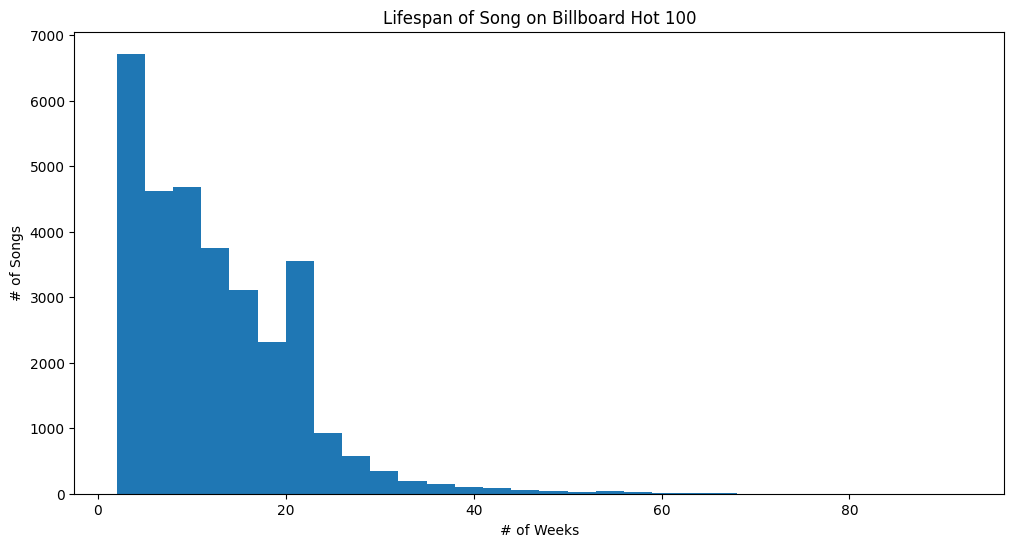

In [24]:
weeks_on_chart = pivot.notna().sum(axis=1)

# Add it as a new column in the pivot table
pivot["total_weeks_on_chart"] = weeks_on_chart

plt.figure(figsize=(12, 6))

# Show result
pivot["total_weeks_on_chart"].plot(kind="hist",
                                   bins=30)
plt.title("Lifespan of Song on Billboard Hot 100")
plt.xlabel("# of Weeks")
plt.ylabel("# of Songs")

In [44]:
print(weeks_on_chart.describe())

max_weeks = pivot.reset_index()
max_weeks = max_weeks[max_weeks["total_weeks_on_chart"] == weeks_on_chart.max()]

print(f"Longest Billboard Streak: {max_weeks["performer"]} @ {weeks_on_chart.max()} weeks ")

count    31344.000000
mean        11.961811
std          8.522820
min          2.000000
25%          5.000000
50%         10.000000
75%         17.000000
max         92.000000
dtype: float64
Longest Billboard Streak: 10077    Glass Animals
Name: performer, dtype: object @ 92 weeks 


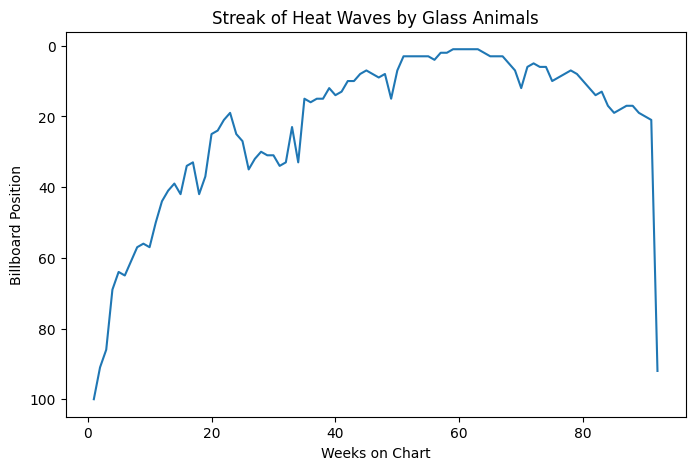

In [51]:
# Extract the row for that song
track = pivot.loc[("Heat Waves", "Glass Animals")].dropna()

# Re-number weeks from 1 to N
track.index = range(1, len(track)+1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(track)
plt.gca().invert_yaxis()  # rank 1 at the top
plt.title(f"Streak of Heat Waves by Glass Animals")
plt.xlabel("Weeks on Chart")
plt.ylabel("Billboard Position")
plt.show()

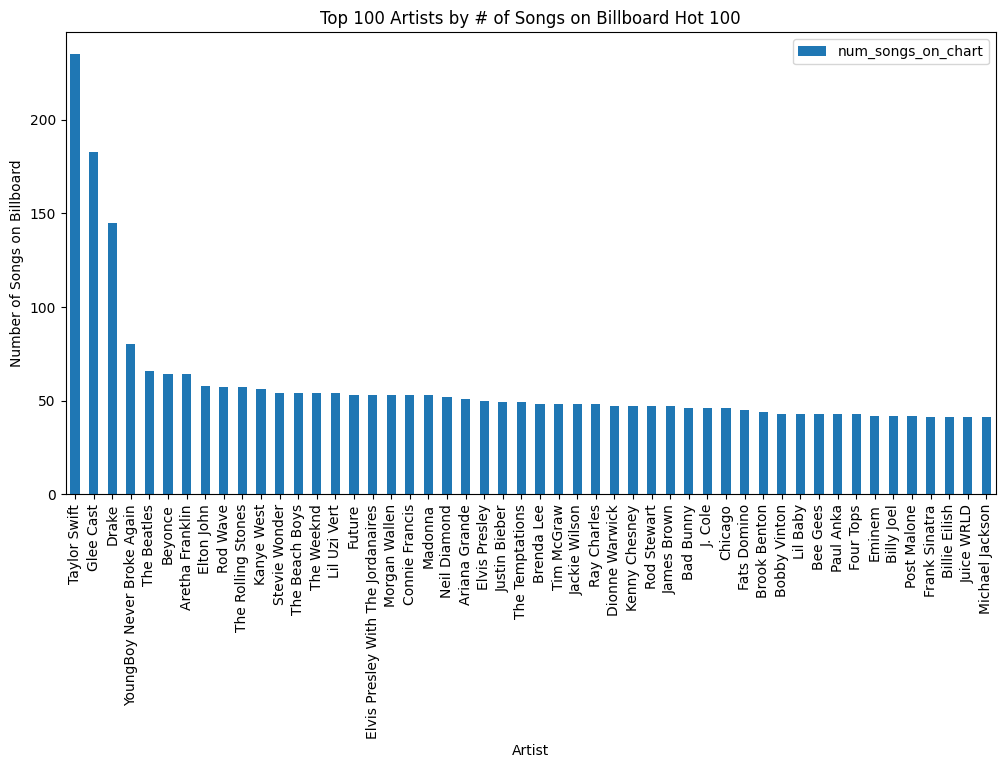

In [22]:
# Reset pivot index
pivot_reset = pivot.reset_index()

# Count distinct songs per performer
songs_per_performer = pivot_reset.groupby("performer")["title"].nunique()

# Convert Series to DataFrame and rename column
songs_per_performer = songs_per_performer.reset_index()
songs_per_performer = songs_per_performer.rename(columns={"title": "num_songs_on_chart"})

# Take top 100 performers
top100 = songs_per_performer.sort_values("num_songs_on_chart", ascending=False).head(50)

# Plot
top100.plot(x="performer", y="num_songs_on_chart", kind="bar", figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Number of Songs on Billboard")
plt.title("Top 100 Artists by # of Songs on Billboard Hot 100")
plt.show()

# Example: Tracking Bob Dylan's Chart Peformance By Song #

We chose Bob Dylan as an example because he had relavitely few hit singles when compared to a more sensational artist, which makes this specific visualization easier. The result shows a pattern of rises and falls, which falls in line with what we expected to observe for the performance of a song.

In [18]:
bob = pivot[
    pivot.index.get_level_values("performer").str.contains("bob dylan", case=False)
]
bob = bob.drop(columns="total_weeks_on_chart")

aligned = {}

for (title, performer), row in bob.iterrows():

    # Drop weeks where the song wasn't on the chart
    track = row.dropna().sort_index()
    
    # Re-number from 1 to N
    track.index = range(1, len(track) + 1)
    
    aligned[(title, performer)] = track

aligned_df = pd.DataFrame(aligned)

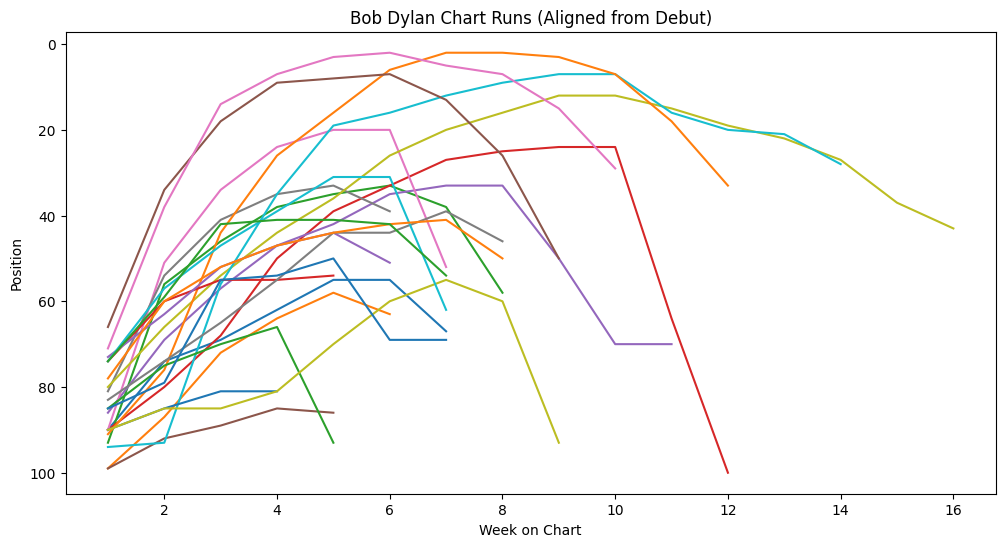

In [ ]:
plt.figure(figsize=(12, 6))

for col in aligned_df:
    plt.plot(aligned_df.index, aligned_df[col], label=col[0])

plt.gca().invert_yaxis()
plt.title("Bob Dylan's Chart Runs (Aligned from Debut)")
plt.xlabel("Week on Chart")
plt.ylabel("Position")
plt.show()